<a href="https://colab.research.google.com/github/Andres-Gress/Simulacion-I/blob/main/PruebaKolmogorovSmirnov_Simu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkred"> PRUEBA DE KOLMOGOROV-SMIRNOV </font>

Se realiza la prueba de kolmogorov- Smirnov para saber si un conjunto de datos proviene de una distribución uniforme $U(0,1)$

Se plantea la hipótesis

$$H_0: x_n \sim U(0,1)$$

$$H_a: x_n \not\sim U(0,1)$$

Los pasos para la prueba son:

1.   Se ordenan los números de la muestra de menor a mayor
2.   Se calcula el estadístico de prueba $D$ a partir de:

$$D^+ = max_{1<i<n} \left|\frac{i}{n} - x_i \right|$$

$$D^- = max_{1<i<n} \left|x_i - \frac{i-1}{n} \right|$$

$$D = max(D^+,D^-) $$

3.   Comparar el valor crítico $d_{\alpha,n}$

Si $D < d_{\alpha,n}$ no se rechaza $H_0$

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstwo
import matplotlib.pyplot as plt
import tabulate

Se importan las librerias necesarias para extraer los datos de github, calcular maximos, el punto crítico, tabular y gráficar

In [2]:
url = 'https://raw.githubusercontent.com/Andres-Gress/Simulacion-I/refs/heads/main/datos.txt' #Url de github en raw para llamarlo posteriormente

data = pd.read_csv(url, header=None) #Obtiene los archivos del URL y se indica que no hay encabezados
data = data.dropna(axis=1, how='all')  #Elimina columnas de NaN que se generan por default
datos=list(data.iloc[0]) #Convierte en una lista de datos phyton

Datos obtenidos de un repositorio de github y convertidos a una lista phyton para operar con ellos

In [3]:
datos.sort() #Ordena de menor a mayor

Se ordenan los datos de menor a mayor

In [4]:
def kolmogorov(datos,a):
  n=len(datos)

  muestra=[]
  for i in range(n):
    d_men=abs(datos[i]-(i/n)) #Se hizo un pequeño cambio para que i comeince en 0 y no en 1
    d_mas=abs((i+1)/n - datos[i])
    dmen=np.max(d_men) #Obtiene D-
    dmas=np.max(d_mas) #Obtiene D+
    D=max(dmen,dmas) #Estadistico de prueba

    muestra.append([i,datos[i],i/n,(i+1)/n,d_men,d_mas]) #Para la tabla

  encabezados = ["i", "xi", "(i-1)/n", "i/n","D-", "D+"]
  print(tabulate.tabulate(muestra,headers=encabezados,tablefmt="psql",numalign="center"))

  d_critico = kstwo.ppf(1 - a, n) #Calcula el punto crítico

  if D > d_critico:
    print("Rechazar H0: La muestra de números proviene de una distribución U(0,1)")
  else:
    print("No rechazar H0: La muestra de números proviene de una distribución U(0,1)")


Se crea una función en la cual se calcula el valor de $D$ que vendría siendo el estadistico de prueba y se compara con el punto crítico, a aprtir de ello se toma la decisión de aceptar o rechazar $H_0$ con cieto nivel de confianza $1-\alpha$

Además la función imprime la tabla con los datos necesarios para hacer cálculos manuales y corroborar lo obtenido

In [5]:
a=0.05
kolmogorov(datos,a)

+-----+---------+-----------+-------+---------+---------+
|  i  |   xi    |  (i-1)/n  |  i/n  |   D-    |   D+    |
|-----+---------+-----------+-------+---------+---------|
|  0  | 0.00121 |     0     | 0.01  | 0.00121 | 0.00879 |
|  1  | 0.03185 |   0.01    | 0.02  | 0.02185 | 0.01185 |
|  2  | 0.03272 |   0.02    | 0.03  | 0.01272 | 0.00272 |
|  3  | 0.0501  |   0.03    | 0.04  | 0.0201  | 0.0101  |
|  4  | 0.0523  |   0.04    | 0.05  | 0.0123  | 0.0023  |
|  5  | 0.05475 |   0.05    | 0.06  | 0.00475 | 0.00525 |
|  6  | 0.07281 |   0.06    | 0.07  | 0.01281 | 0.00281 |
|  7  | 0.08128 |   0.07    | 0.08  | 0.01128 | 0.00128 |
|  8  | 0.09133 |   0.08    | 0.09  | 0.01133 | 0.00133 |
|  9  | 0.09264 |   0.09    |  0.1  | 0.00264 | 0.00736 |
| 10  | 0.10639 |    0.1    | 0.11  | 0.00639 | 0.00361 |
| 11  | 0.1085  |   0.11    | 0.12  | 0.0015  | 0.0115  |
| 12  | 0.11537 |   0.12    | 0.13  | 0.00463 | 0.01463 |
| 13  | 0.12079 |   0.13    | 0.14  | 0.00921 | 0.01921 |
| 14  | 0.1415

Se elige el valor de $\alpha =0.05$ para tener una confianza del $95\%$ y se toma la decisión de No rechazar $H_0$

Por lo que se concluye que la muestra de datos proviene de una distribución uniforme $U(0,1)$

Además se imprime la tabla de donde se obtiene el estadístico de prueba

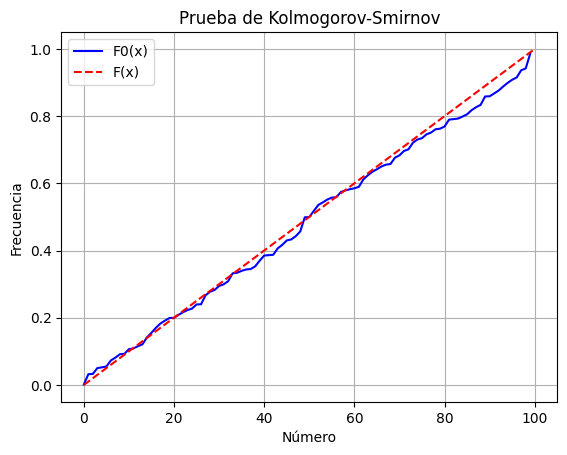

In [6]:
x=np.linspace(0,100,100)
y=np.linspace(0,1,100)

plt.plot(datos, color="blue", label="F0(x)")
plt.plot(x,y, color="red", label="F(x)", linestyle="--")
plt.legend()
plt.title('Prueba de Kolmogorov-Smirnov')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Gráfica de $F(x)$ que sería la frecuencia acumulada de una $U(0,1)$ y se aprecia junto a $F_0(x)$ que representaría la frecuencia acumulada de los datos que es muy próxima a $F(x)$, por lo que se reafirma el porque no se rechaza $H_0$